# Generating a Coloured Mexican Map

Author: **J Rogel-Salazar**

We are using Python to create a map of Italy with coloured provinces based on values assigned to each of them.

To reuse this code you need to make sure that you have a shape file for the geographical region you are plotting. 

I am using Python 2 in this example.

You will need some modules from the matplot library and pandas. You will also need to install:
- basemap
- shapely
- descartes

In [1]:
# From matplotlib and pandas
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 
from matplotlib.collections import PatchCollection
import pandas as pd

# Other libraries required:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
from descartes import PolygonPatch

Populating the interactive namespace from numpy and matplotlib


We are using a CSV file that contains some data for number of "customers" in each State of Mexico

Let us read the data with pandas:

In [2]:
df = pd.read_csv("../data/Mexican_StatesData.csv",keep_default_na=False,na_values=['_'])

In [3]:
df.head()

,State Name,Customers
0,AGUASCALIENTES,16071
1,BAJA CALIFORNIA NORTE,38863
2,BAJA CALIFORNIA SUR,2590
3,CAMPECHE,8778
4,CHIAPAS,11010


The map that we will use has encoded "Baja Californa Norte" as "Baja California", and "Estado (Edo.) de Mexico" and "Mexico".

Don't worry if you are confused, there are several "Mexicos" in the country! :)

Let us change these entries and change the State names to lower case

In [8]:
mask1 = df['State Name'] == 'BAJA CALIFORNIA NORTE'
mask2 = df['State Name'] == 'EDO. DE MEXICO'

df.loc[mask1, 'State Name']="BAJA CALIFORNIA"
df.loc[mask2, 'State Name']="MEXICO"

df['State Name']=df['State Name'].str.lower()

df['State Name']

0          aguascalientes
1         baja california
2     baja california sur
3                campeche
4                 chiapas
5               chihuahua
6                coahuila
7                  colima
8        distrito federal
9                 durango
10                 mexico
11             guanajuato
12               guerrero
13                hidalgo
14                jalisco
15              michoacan
16                morelos
17                nayarit
18             nuevo leon
19                 oaxaca
20                 puebla
21              queretaro
22           quintana roo
23        san luis potosi
24                sinaloa
25                 sonora
26                tabasco
27             tamaulipas
28               tlaxcala
29               veracruz
30                yucatan
31              zacatecas
Name: State Name, dtype: object

Let us get the maximum number of customers...

In [9]:
max_cust = df.Customers.max()

# Load the Shape File for Italy

You need to provide appropriate latitude and longitude entries for the geographical area you need to plot. 

- llcrnrlon: longitude of lower left hand corner of the desired map domain (degrees).
- llcrnrlat: latitude of lower left hand corner of the desired map domain (degrees).
- urcrnrlon: longitude of upper right hand corner of the desired map domain (degrees).
- urcrnrlat: latitude of upper right hand corner of the desired map domain (degrees).

See the Basemap documentation [here](http://matplotlib.org/basemap/api/basemap_api.html)

(32,
 5,
 [-118.40416717487506, 14.550546646410794, 0.0, 0.0],
 [-86.73861694371683, 32.718456268741946, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x115ccfdd0>)

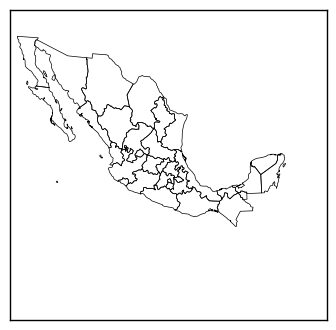

In [11]:
m = Basemap(llcrnrlon=-115,llcrnrlat=5,urcrnrlon=-80,urcrnrlat=35,
            resolution='i',projection='tmerc',lon_0=-99,lat_0=19)
m.readshapefile("../data/mexstates/mexstates", "mexican_states")


Let us create a dictionary of that links the name of the province to the density calculated above:

In [12]:
mexican_states = pd.Series(df['Customers'].values, index=df['State Name']).to_dict()

## Colouring map

We need to create patches of colour that correspond to the shape file entries. In this case the names of the provinces are encoded in the "ADMIN_NAME" field. 

In [13]:
state_patches = []
for coordinates, state in zip(m.mexican_states, m.mexican_states_info):
    #print state["ADMIN_NAME"].lower()
    if state["ADMIN_NAME"].lower() in mexican_states.keys():
        #print(state["ADMIN_NAME"])
        shade = 3*mexican_states[state["ADMIN_NAME"].lower()]/float(max_cust)
        if shade>1:
            shade=1
        #print(shade)
        state_patches.append(PolygonPatch(Polygon(coordinates), fc="darkred",
                                         ec='#555555', lw=.2, alpha=shade, zorder=4))

Let us create the map now:

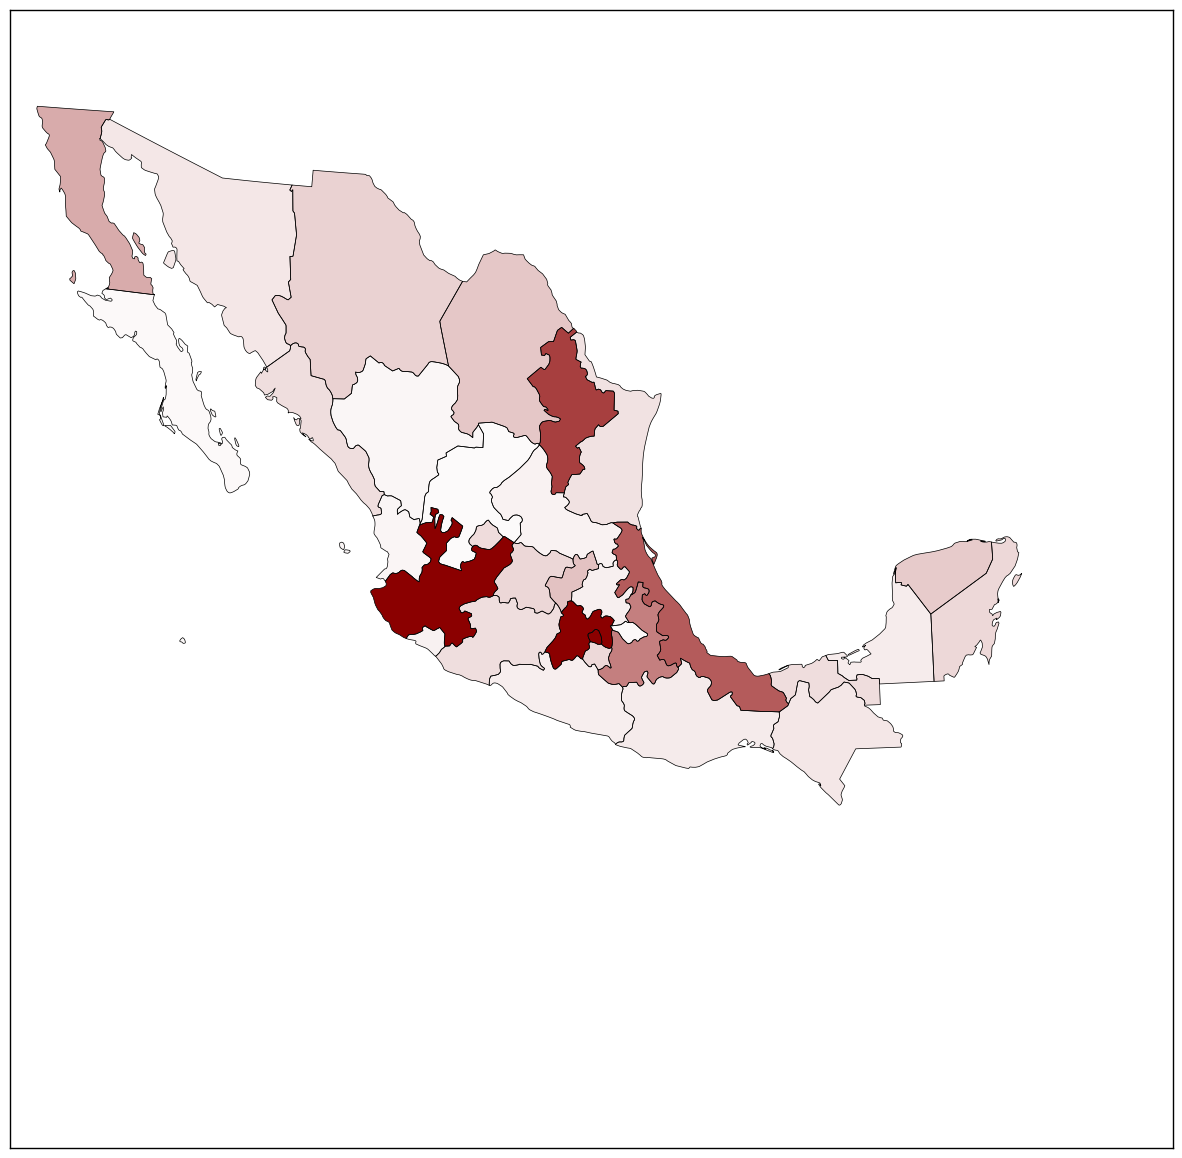

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
m.readshapefile("../data/mexstates/mexstates", "mexican_states")
ax.add_collection(PatchCollection(state_patches, match_original=True))